# Sprint5
## 機械学習スクラッチSVM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy.random import *
from sklearn.datasets import load_iris

## Irisデータ取得

In [2]:
iris=load_iris()

In [623]:
X=iris.data[50:,2:]
y=iris.target[50:]-1
y[:50]-=1
#y=y.tolist()

In [624]:
#シンプルデータセット1作成コード

np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X1 = np.concatenate((f0, f1))
y1 = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
X1= X1[random_index]
y1 = y1[random_index]

## 【問題1】SVM分類器のクラスを作成する

In [742]:
class ScratchSVMClassifier():
    """
    SVMのスクラッチ
    
    Parameters
    ----------

    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    lam : lambda
      正則化の値
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録
    """
    
    def __init__(self, num_iter, lr, verbose, threshold=0.55):
        self.iter=num_iter
        self.lr=lr
        self.verbose=verbose
        self.ts=threshold
        #サポートベクタ配列
        self.lam_array=np.array([])
        self.y_label =np.array([])
        self.sv =np.array([])
        
    def fit(self,X,y,X_val=None,y_val=None):
        """
        SVMを学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        #サンプル数定義
        self.m=X.shape[0]
        
        #ラグランジュ関数の初期値設定
        self.lam=np.random.rand(self.m,1)
        
        #サポートベクトルを探す
        for n in rand(self.iter):
            y=y.reshape(-1,1)
            y_mat=np.dot(y,y.T)
            X_mat=np.dot(X,X.T)
            Xy_mat=y_mat*X_mat
            temp=np.dot(Xy_mat,self.lam)
            
            #ラグランジュ関数（ラムダ）更新式
            #print(self.lam)
            self.lam = self.lam + self.lr * (1-temp)
            #ラグランジュがマイナスの場合
            self.lam[np.where(self.lam<0,True,False)]=0
            
        # サポートベクター選定(閾値以上のラムダ格納) 
        self.lam_array =(self.lam[self.lam >= self.ts])
        #lam_arrayのshape
        #print(self.lam_array.shape,"ramuda")
        # 閾値以上のラムダのインデックスを取得
        self.sv_index =np.where(self.lam >= self.ts)[0]
        #sv_indexのshape
        #print(self.sv_index.shape,"svi")
        # ラベル取得
        self.y_label =y[self.sv_index]
        #self.y_labelのshape
        #print(self.y_label.shape,"yラベル")
        # サポートベクター取得
        self.sv =X[self.sv_index]    
        #self.cvのshape
        #print(self.sv.shape,"SV")
        
        self.X=X
        self.y=y
    def predict(self,X):
        """
        SVMを使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
       thetashould : 閾値　def＝０.５
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        
        pred = np.dot(self.lam_array,self.y_label*np.dot(self.sv,X.T))
        #pred = np.dot(self.lam.reshape(1,-1),self.y*np.dot(self.X,X.T))
        return np.where(pred<0,-1,1)
    

                    

In [703]:
model_s1=ScratchSVMClassifier(10000, 0.0001, True, 0.01)

In [621]:
model_s1.fit(X1,y1)

In [603]:
model_s1.lam_array

array([0.29558125, 0.06836483, 0.1269957 , 0.16529264, 0.27263621,
       0.03978033, 0.07762432, 0.019916  ])

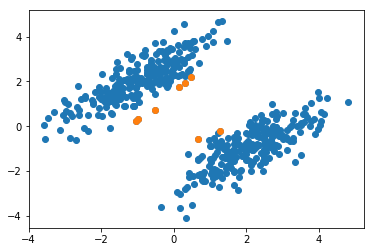

In [604]:
plt.scatter(X1[:,0],X1[:,1])
plt.scatter(model_s1.sv[:,0],model_s1.sv[:,1])
plt.show()

In [743]:
model=ScratchSVMClassifier(1000, 0.00001, True, 0)

In [744]:
model.fit(X_train,y_train)

In [745]:
model.lam_array

array([0.83098477, 0.55558671, 0.00405424, 0.73170008, 0.95318075,
       0.03284308, 0.67640503, 0.81581204, 0.30533327, 0.38088092,
       0.23048531, 0.34617902, 1.01602744, 0.05366275, 0.30794812,
       0.65850135, 0.82303175, 0.05119007, 0.00952708, 0.91158838,
       0.57181801, 0.87086733, 0.90874954, 0.90202711, 0.52822162,
       0.22658256, 0.70293204, 0.27858797, 0.81387719, 0.79629442,
       0.53846286, 0.12596394, 0.85985903, 0.87991029, 0.81914861,
       0.83089317, 0.13165404, 0.06812428, 0.47743758, 0.44766406,
       0.21176705, 0.97187831, 0.42318583, 0.96798865, 0.03189875,
       0.26029921, 0.95762776, 0.98628522, 0.27181727, 0.25802986,
       0.73831695, 0.18928503, 0.72466288, 1.01599422, 0.24229651,
       0.73758246, 0.78973145, 0.        , 0.27004248, 0.22327151,
       0.52475814, 0.42302608, 0.1774486 , 0.67563256, 0.26839243,
       1.00096475, 0.66754723, 0.91001946, 0.53787059, 0.40922375,
       0.89030126, 0.60239485, 0.20458854, 0.59177826, 0.57971

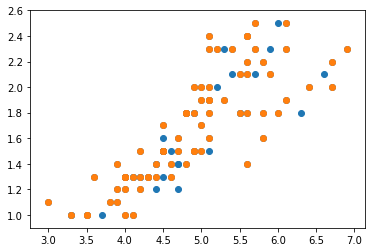

In [746]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(model.sv[:,0],model.sv[:,1])
plt.show()

In [747]:
model.predict(X_test)

array([-1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1, -1,  1, -1, -1, -1, -1,
        1,  1, -1, -1, -1, -1, -1,  1])

In [711]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25,random_state=9999)

In [407]:
class ScratchSVMClassifier2:
    def __init__(self, num_iter, lr, threshold=1e-5):
        self.iter = num_iter
        self.lr = lr
        self.ts = threshold
        self.y_label = []
        self.sv = []
        self.lam_array = [] 
        
    def fit(self, X, y):
        # ラムダ配列初期値
        lam = np.random.rand(len(X), 1)
        
        # サポートベクトル探索
        for n in range(self.iter):
            for i in range(len(X)):
                temp = 0
                for j in range(len(X)):
                    temp += lam[j]*y[i]*y[j]*np.dot(X[i].T, X[j])
                # ラムダの更新
                lam[i] = lam[i] + self.lr * (1 - temp)
                if(lam[i] < 0):
                    lam[i] = 0
                    
        # 閾値以上のラムダ選出
        self.lam_array = lam[lam >= self.ts]
        # 閾値以上のラムダのインデックスを取得
        index = np.where(lam >= self.ts)[0]
        # yラベルを取得
        self.y_label = y[index]
        # サポートベクター配列
        self.sv = X[index]       
        
    def predict(self, X):
        
        pred = 0
        for i in range(len(self.sv)):
                pred = pred +self.lam_array[i] * self.y_label[i] * np.dot(X, self.sv[i].T)
                
        return pred

In [404]:
model2=ScratchSVMClassifier2(200,0.01)

In [403]:
model2.fit(X_train,y_train)

In [409]:
model2.predict(X_test)

array(1)

In [630]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def SVM(X, y, model, step=0.01, title='logistic region', xlabel='petal_length', ylabel='petal_width', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
 
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

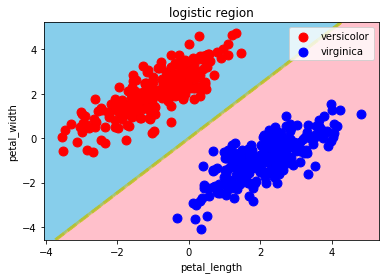

In [605]:
SVM(X1,y1,model)

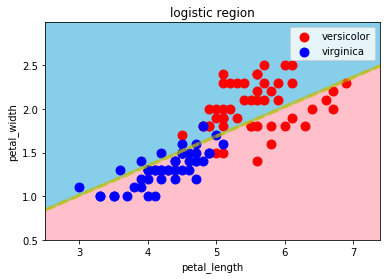

In [748]:
SVM(X,y,model)